In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.duration.hazard_regression as coxph
import lifelines
#from lifelines.datasets import load_rossi
import matplotlib.pyplot as plt
import dcurves

In [2]:
pd.set_option('display.max_rows', 500)


In [3]:
binary_abs_path = '/Users/ShaunPorwal/Documents/GitHub/python_packages/dcurves/dcurves/data/df_binary.csv'
surv_abs_path = '/Users/ShaunPorwal/Documents/GitHub/python_packages/dcurves/dcurves/data/df_surv.csv'
case_control_abs_path = '/Users/ShaunPorwal/Documents/GitHub/python_packages/dcurves/dcurves/data/df_case_control.csv'
df_dan_test_path = '/Users/ShaunPorwal/Desktop/df_cancer_dx.csv'

df_binary = pd.read_csv(binary_abs_path)
df_surv = pd.read_csv(surv_abs_path)
df_case_control = pd.read_csv(case_control_abs_path)

df_dan_test = pd.read_csv(df_dan_test_path)

In [4]:
df_dan_test

,patientid,cancer,risk_group,age,famhistory,marker,cancerpredmarker
0,1,0,low,64.03445,0,0.776309,0.037201
1,2,0,high,78.46741,0,0.267086,0.578907
2,3,0,low,64.14617,0,0.169621,0.021551
3,4,0,low,58.53482,0,0.023996,0.003910
4,5,0,low,63.99250,0,0.070910,0.018790
...,...,...,...,...,...,...,...
745,746,0,intermediate,66.09628,0,0.654782,0.057813
746,747,1,intermediate,65.75370,1,1.030259,0.160424
747,748,0,intermediate,70.28287,0,0.151616,0.108838
748,749,0,low,61.32673,0,0.624602,0.015285


In [5]:
# binary inputs

binary_inputs = {
    'data': df_binary,
    'outcome': 'cancer',
    'predictors': ['cancerpredmarker', 'marker'],
    'thresh_lo': 0.01,
    'thresh_hi': 0.35,
    'thresh_step': 0.01,
    'harm': None,
    'probabilities': [False, True],
    'time': None,
    'prevalence': None,
    'time_to_outcome_col': None
}

survival_inputs = {
    'data': df_surv,
    'outcome': 'cancer',
    'predictors': ['cancerpredmarker'],
    'thresh_lo': 0.01,
    'thresh_hi': 0.50,
    'thresh_step': 0.01,
    'harm': None,
    'probabilities': [False],
    'time': 1,
    'prevalence': None,
    'time_to_outcome_col': 'ttcancer'
}

dan_test_inputs = {
    'data': df_dan_test,
    'outcome': 'cancer',
    'predictors': ['famhistory'],
    'thresh_lo': 0.01,
    'thresh_hi': 1,
    'thresh_step': 0.01,
    'harm': None,
    'probabilities': [False],
    'time': None,
    'prevalence': None,
    'time_to_outcome_col': None
}

In [6]:
binary_inputs['outcome']

'cancer'

In [7]:
binary_output_df = dcurves.dca.dca(data = binary_inputs['data'],
        outcome = binary_inputs['outcome'],
        predictors = binary_inputs['predictors'],
        thresh_lo = binary_inputs['thresh_lo'],
        thresh_hi = binary_inputs['thresh_hi'],
        thresh_step = binary_inputs['thresh_step'],
        harm = binary_inputs['harm'],
        probabilities = binary_inputs['probabilities'],
        time = binary_inputs['time'],
        prevalence = binary_inputs['prevalence'],
        time_to_outcome_col = binary_inputs['time_to_outcome_col'])

In [8]:
survival_output_df = dcurves.dca.dca(data = survival_inputs['data'],
        outcome = survival_inputs['outcome'],
        predictors = survival_inputs['predictors'],
        thresh_lo = survival_inputs['thresh_lo'],
        thresh_hi = survival_inputs['thresh_hi'],
        thresh_step = survival_inputs['thresh_step'],
        harm = survival_inputs['harm'],
        probabilities = survival_inputs['probabilities'],
        time = survival_inputs['time'],
        prevalence = survival_inputs['prevalence'],
        time_to_outcome_col = survival_inputs['time_to_outcome_col'])

In [9]:
dan_test_output_df = dcurves.dca.dca(data = dan_test_inputs['data'],
        outcome = dan_test_inputs['outcome'],
        predictors = dan_test_inputs['predictors'],
        thresh_lo = dan_test_inputs['thresh_lo'],
        thresh_hi = dan_test_inputs['thresh_hi'],
        thresh_step = dan_test_inputs['thresh_step'],
        harm = dan_test_inputs['harm'],
        probabilities = dan_test_inputs['probabilities'],
        time = dan_test_inputs['time'],
        prevalence = dan_test_inputs['prevalence'],
        time_to_outcome_col = dan_test_inputs['time_to_outcome_col'])


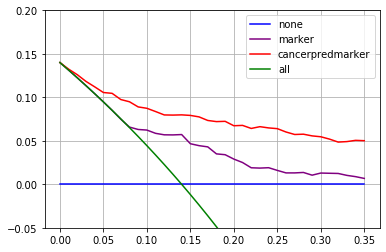

In [10]:
dcurves.dca.plot_net_benefit_graphs(binary_output_df)

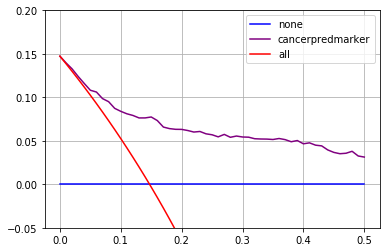

In [11]:
dcurves.dca.plot_net_benefit_graphs(survival_output_df)

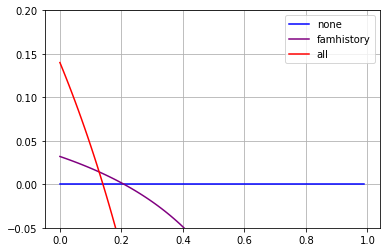

In [12]:
dcurves.dca.plot_net_benefit_graphs(dan_test_output_df)


In [ ]:
dan_test_output_df[dan_test_output_df['predictor']=='famhistory']

In [14]:
# dan_test_output_df.to_csv('/Users/ShaunPorwal/Desktop/dan_test_python_output.tsv')

In [15]:
# dan_test_output_df